## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [95]:
file_path = "C:\\Users\\G020772\\data\\bootcamp\\QueryResults.csv"
df = pd.read_csv(file_path, names = ["timestamp", "tag", "count"], header=1)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [96]:
df.head()

,timestamp,tag,count
0,2008-08-01 00:00:00,assembly,8
1,2008-08-01 00:00:00,javascript,162
2,2008-08-01 00:00:00,c,85
3,2008-08-01 00:00:00,python,124
4,2008-08-01 00:00:00,perl,28


In [97]:
df.tail()

,timestamp,tag,count
1985,2020-07-01 00:00:00,r,5694
1986,2020-07-01 00:00:00,go,743
1987,2020-07-01 00:00:00,ruby,775
1988,2020-07-01 00:00:00,perl,182
1989,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [98]:
df.shape

(1990, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1990 non-null   object
 1   tag        1990 non-null   object
 2   count      1990 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [100]:
df[["tag", "count"]].groupby("tag").sum()

,count
tag,
assembly,34852
c,336042
c#,1423527
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 

In [101]:
df.groupby("tag").count()

,timestamp,count
tag,,
assembly,144,144
c,144,144
c#,144,144
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [102]:
type(df["timestamp"][1])

str

In [103]:
type(pd.to_datetime(df["timestamp"][1]))

pandas._libs.tslibs.timestamps.Timestamp

In [104]:
pd.to_datetime(df["timestamp"][1])

Timestamp('2008-08-01 00:00:00')

In [105]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [106]:
df.head()

,timestamp,tag,count
0,2008-08-01,assembly,8
1,2008-08-01,javascript,162
2,2008-08-01,c,85
3,2008-08-01,python,124
4,2008-08-01,perl,28


## Data Manipulation

In [107]:
df_reshaped = df.pivot(index="timestamp", columns="tag", values="count")
df_reshaped.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
timestamp,,,,,,,,,,,,,,
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
2008-12-01,18.0,186.0,1597.0,633.0,134.0,NaN,832.0,627.0,134.0,481.0,441.0,1.0,161.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [108]:
df_reshaped.shape

(144, 14)

In [109]:
df_reshaped.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='tag')

In [110]:
df_reshaped.fillna(0, inplace=True)

In [111]:
df_reshaped.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
timestamp,,,,,,,,,,,,,,
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
2008-12-01,18.0,186.0,1597.0,633.0,134.0,0.0,832.0,627.0,134.0,481.0,441.0,1.0,161.0,0.0


In [112]:
df_reshaped.isna().values.any()

False

## Data Visualisaton with with Matplotlib

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

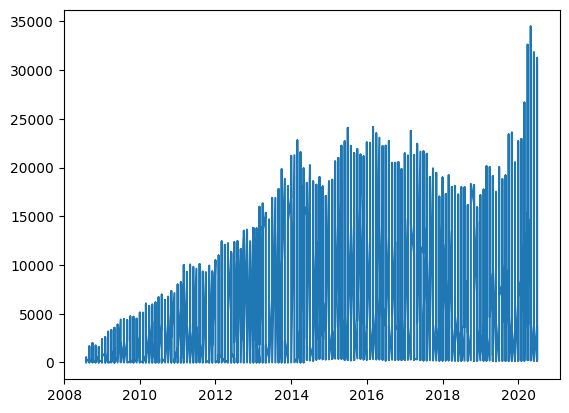

In [121]:
plt.plot(df['timestamp'], df['count'])

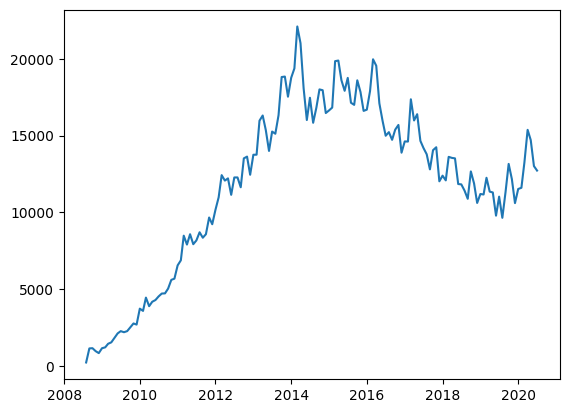

In [122]:
plt.plot(df_reshaped.index, df_reshaped['java'])

In [155]:
df_roll = df_reshaped.rolling(window=3).mean()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

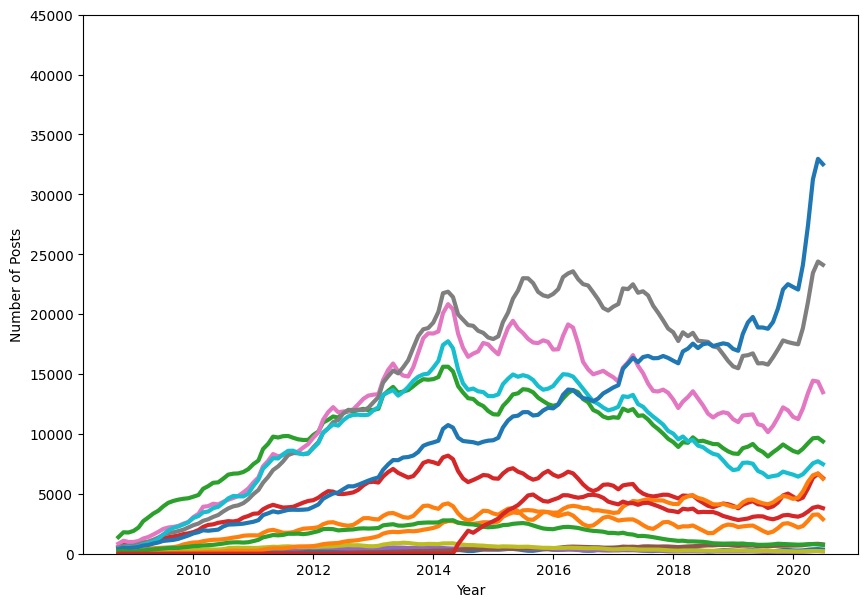

In [156]:
plt.figure(figsize=(10, 7))
plt.xlabel("Year")
plt.ylabel('Number of Posts', fontsize=10)
plt.ylim(0, 45000)
plt.plot(df_roll.index, df_roll, linewidth=3)

In [171]:
df_roll.head(2)

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
timestamp,,,,,,,,,,,,,,
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------
## QUIZ

Most popular language 2008-2012

In [172]:
df_utvalg = df_reshaped.loc["2008-01-01 00:00:00":"2012-12-12 00:00:00"]
df_utvalg.tail(2)

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
timestamp,,,,,,,,,,,,,,
2012-11-01,303.0,3198.0,12247.0,6280.0,444.0,104.0,13632.0,12357.0,640.0,11837.0,6403.0,1346.0,2134.0,2.0
2012-12-01,264.0,2573.0,10966.0,5692.0,429.0,113.0,12451.0,11751.0,558.0,11127.0,5765.0,1216.0,1906.0,3.0


In [170]:
df_utvalg.sum().idxmax()

'c#'

Most popular language 2015-2018

In [173]:
df_utvalg = df_reshaped.loc["2015-01-01 00:00:00":"2018-12-12 00:00:00"]
df_utvalg.sum().idxmax()

'javascript'

Most popular language 2020

In [174]:
df_utvalg = df_reshaped.loc["2020-01-01 00:00:00":"2020-12-12 00:00:00"]
df_utvalg.sum().idxmax()

'python'